In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
data

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data.shape

(349, 10)

In [ ]:
data.dtypes

,0
Disease,object
Fever,object
Cough,object
Fatigue,object
Difficulty Breathing,object
Age,int64
Gender,object
Blood Pressure,object
Cholesterol Level,object
Outcome Variable,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
data.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [ ]:
data.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

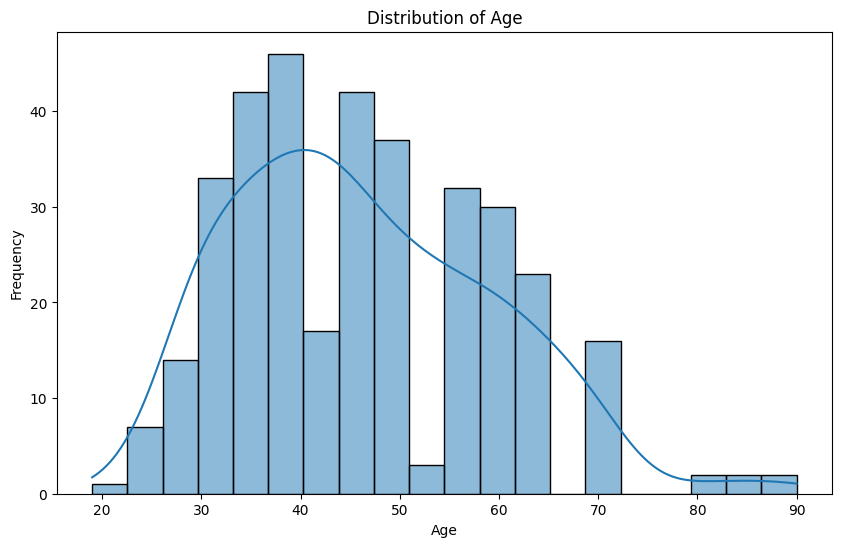

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

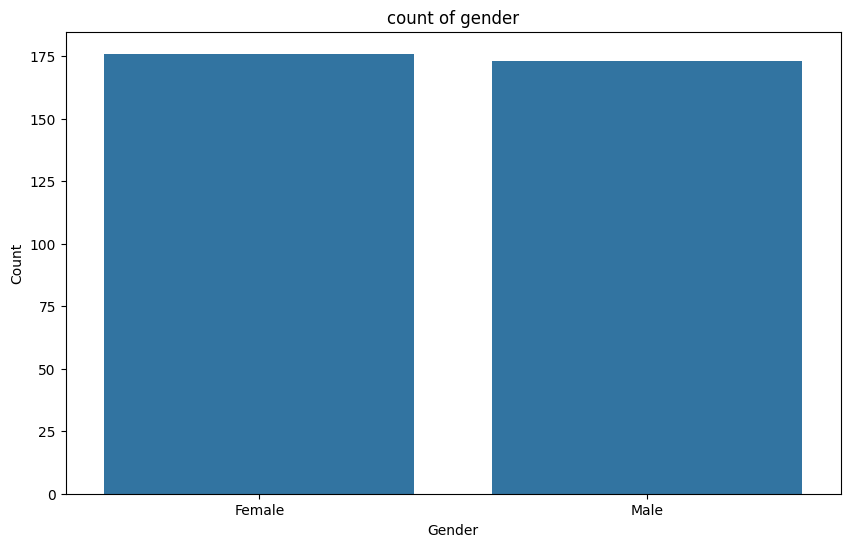

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=data)
plt.title('count of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print("\nCategorical Features:", categorical_features)
print("\nNumerical Features:", numerical_features)


Categorical Features: Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

Numerical Features: Index(['Age'], dtype='object')


In [ ]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])
X = data.drop('Outcome Variable', axis=1)
y = data['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build a RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Predict on test data
y_pred = rf_classifier.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.8142857142857143


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [ ]:
cluster_labels = kmeans.labels_
print("\nCluster Labels:", cluster_labels)


Cluster Labels: [2 0 2 0 0 2 2 2 2 2 0 0 0 0 0 2 1 1 0 2 1 1 0 0 0 2 2 2 2 2 2 1 1 1 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 1 0 2 0 2 1 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1
 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 1 0 0 2 2 1
 2 0 0 0 0 0 2 2 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 2 2
 2 2 2 2 2 1 1 0 2 2 2 1 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 1 1
 1 1 0 0 0 0 0 0 2 2 2 2 2 1 1 1 1 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 0 0
 0 2 2 2 1 1 1 1 1 1 1 1 1 2 1 0 0 0 2 2 2 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 1 0 0 0 0 0 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1]


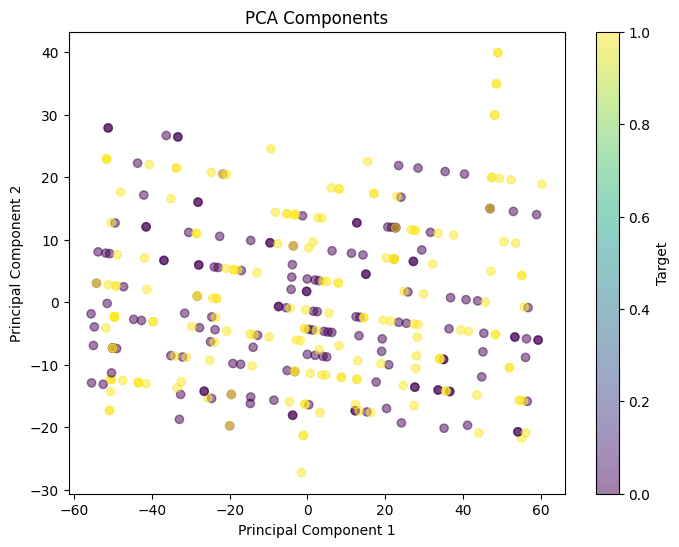

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()